We are given $N=5$ variables and $M$ observations. The observations are:

$$\textbf{x}^{(m)}=(x_1^{(m)},\dots ,x_N^{(m)})$$

Where $x_i^{(m)}\in\{1,\dots,q\}$ are categorical variable. In order to model the interaction between these variables we use the Potts model. Let $J_{ij}\in \R^{q\times q}$ be the coupling matrix for the variables $i$ and $j$ having respectevly colors $a$ and $b$, i.e. if $J_{ij}(a,b)\neq0$ then the variables interact (accordingly to the sign) while if $J_{ij}(a,b)\sim0$ they do not. 

We consider the model:

$$P\left(x\,|\,J\right)=\frac{1}{Z}e^{\sum_{ij}\sum_{ab}J_{ij}(a,b)\delta_{(x_i,a)}\delta_{(x_j,b)}}$$

Where:

$$Z\left(J\right) = \sum_{x} e^{\sum_{i,j}\sum_{ab}J_{ij}(a,b)\delta_{(x_i,a)}\delta_{(x_j,b)}}$$

Therefore we consider the likelihood:

$$\mathcal{L}\left(J;\left\{x_i^{(m)}\right\}_{m=1}^{M}\right)=\prod_m\frac{1}{Z}e^{\sum_{ij}\sum_{ab}J_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)}}$$

In order to design a Boltzmann machine learing scheme let us compute the log-likelihood divided by $M$ and its derivative with respect to each parameter $J_{ij}(a,b)$:

$$\mathcal{l}\left( J ; \{x^{(m)} \} \right) = {\frac{1}{M}}  \sum_{ij}\sum_{ab}\sum_mJ_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} - \log\left[ Z\left( J\right)\right]$$

Then:

\begin{align}
\frac{\partial \mathcal{l} \left(J ; \{x^{(m)} \}  \right)}{\partial J_{i,j}(a,b)} & = {\frac{1}{M}} \sum_{m} \delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} - \frac{1}{Z\left( J\right)} \sum_{\boldsymbol{x}} \delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} e^{\sum_{i,j}\sum_{ab}J_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)}} \\
& = { < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{data}} -  < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{model}}}
\end{align}

Then by Boltzmann machine learning we can inferr the coupling matrices. The first term of the difference is easly computable, the second quite not. In order to reach our goal we can use a MCMC with Metropolis-Hastings update or Gibbs sampling:

$$J_{i,j}^{t+1}(a,b) \leftarrow J_{i,j}^{t}(a,b) + \lambda_{J} \left[ < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{data}} -  < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{model}\left(t \right)} \right] $$

For what concernes the MCMC with Metropolis-Hastings update:


- We start from a uniformly randomly extracted configuration $\boldsymbol{x}^{t = 0}$


- As proposal distribution: extract an index $i\in\{1,\dots,N\}$ and a variable $a\in\{1,\dots,q\}$ and substitute the value of $\delta_{(x_i^{t-1},a)}$ with its opposite ($1\rightarrow0$, $0\rightarrow1$)


- Accept the move with probability:

$$p_{\rm acc} =\min\left[1, \frac{q(x^{t-1}|x)\tilde{\pi}(x)}{q(x|x^{t-1})\tilde{\pi}(x^{t-1})} \right]$$

- Save many configuations and compute $<x_{i} x_{j}>_{\mathrm{model}\left(t\right)}$ at $\sim$ equilibrium 

We have to compute the acceptance ration in our setting. By the simmetry of the proposal distribution $q$ we have:

$$\frac{q(x^{t-1}|x)\tilde{\pi}(x)}{q(x|x^{t-1})\tilde{\pi}(x^{t-1})}=\frac{\tilde{\pi}(x)}{\tilde{\pi}(x^{t-1})}$$

We extract the index $i$ and the color $a$ (different from the actual color of $x_i$)and create the proposal $x^n$ as follows:

$$x_k^n=\begin{cases}
x_k & k\neq i \\
a & k=i
\end{cases}$$

Then:

$$\frac{\tilde{\pi}(x^n)}{\tilde{\pi}(x)}=\frac{e^{\sum_{kj}\sum_{cb}J_{kj}(c,b)\delta_{(x_k^n,c)}\delta_{(x_j^n,b)}}}{e^{\sum_{kj}\sum_{cb}J_{kj}(c,b)\delta_{(x_k,c)}\delta_{(x_j,b)}}}=\frac{e^{\sum_{kj}J_{kj}(x_k^n,x_j^n)}}{e^{\sum_{kj}J_{kj}(x_k,x_j)}}$$

Then by definition of $x^n$ and the simmetry $J_{ij}(a,b)=J_{ji}(b,a)$ we have:

$$\sum_{k,j}J_{kj}(x_k^n,x_j^n)-\sum_{k,j}J_{kj}(x_k,x_j)=\sum_{k}J_{ki}(x_k^n,x_i^n)-\sum_{k}J_{ki}(x_k,x_i)+\sum_{j}J_{ij}(x_i^n,x_j^n)-\sum_{j}J_{ij}(x_i,x_j)=$$
$$2\sum_{j\neq i}\left(J_{ij}(x_i^n,x_j^n)-J_{ij}(x_i,x_j)\right)$$

Finally assuming $J_{jj}=0 \,\forall j$ we get:

$$\frac{\tilde{\pi}(x^n)}{\tilde{\pi}(x)}=2\sum_{j}\left(J_{ij}(x_i^n,x_j^n)-J_{ij}(x_i,x_j)\right)$$

Finally update the parameters until convergence, when the maximum value of the gradient is smaller than a certain threshold.

In [1]:
function metropolis_ising(x::Vector{Int64}, J::Array{Matrix{Float64}})

    N = length(x)

    i = rand(1:N)       # draw uniformly an index
    c = rand(1:q-1)     # draw uniformly a color different to the current one of x[i], this is equivalent to uniformly draw a number between 1 and q-1
                        # and then add the drawn number to the current categorical state of x[i]
    xi_new = mod1(x[i]+c, q)
    ΔJ = 0
    for j in 1:N
        if j != i  #we exclude j=i because in the first matrix J we use the proposal  
            ΔJ += 2.0*(J[i,j][xi_new, x[j]] - J[i,j][x[i], x[j]])   # argument of the exponential given by the ratio of the target distribution
        end
    end
    ΔJ += (J[i,i][xi_new, xi_new] - J[i,i][x[i], x[i]])
    if rand() < exp(ΔJ)
        x[i] = xi_new    # if the move is accepted, we update it
    end
    return x

end

metropolis_ising (generic function with 1 method)

In [2]:
function compute_stats(data::Matrix{Int64}; q = 4)
    M = size(data, 1)
    N = size(data, 2)

    sij = Array{Matrix{Float64}}(undef, N, N) 
    for i in eachindex(sij)
        sij[i] = zeros(Float64, q, q)
    end

    for i in 1:N, j in 1:N
        for m in 1:M
            sij[i,j][data[m,i], data[m,j]] += 1
        end
        sij[i,j] ./= M
        #sij[j,i] .= sij[i,j]'
    end

    return sij  # this gives us the sample frequencies
end

compute_stats (generic function with 1 method)

In [20]:
using CSV
using DataFrames

df = DataFrame(CSV.File("C:\\Users\\loren_1hne11w\\Documents\\Models&Algorithms\\data.dat", delim = " ", header = false))
select!(df, Not( :Column6))
xdata = Matrix{Int64}(df)
#"C:\\Users\\lucia\\OneDrive\\Desktop\\Documenti\\Collegio Carlo Alberto\\Models and Algorithms\\data.dat"

2000×5 Matrix{Int64}:
 2  4  1  1  4
 2  1  1  2  2
 4  1  4  4  3
 1  4  3  1  2
 4  2  2  2  3
 3  3  2  2  3
 4  1  3  4  2
 2  4  3  4  1
 4  1  3  4  3
 2  4  2  4  4
 ⋮           
 2  4  4  1  3
 2  1  1  4  3
 4  2  1  1  4
 2  4  3  1  4
 1  4  4  4  1
 4  1  1  2  3
 3  4  3  2  4
 3  3  1  4  4
 3  4  2  1  4

In [21]:
sij = compute_stats(xdata)

5×5 Matrix{Matrix{Float64}}:
 [0.2555 0.0 0.0 0.0; 0.0 0.2545 0.0 0.0; 0.0 0.0 0.2345 0.0; 0.0 0.0 0.0 0.2555]                              …  [0.074 0.0605 0.0575 0.0635; 0.067 0.07 0.0535 0.064; 0.055 0.0565 0.068 0.055; 0.0655 0.057 0.063 0.07]
 [0.03 0.0735 0.056 0.083; 0.072 0.0315 0.072 0.073; 0.0855 0.069 0.032 0.0695; 0.068 0.0805 0.0745 0.03]         [0.067 0.06 0.056 0.0595; 0.064 0.0605 0.0595 0.0645; 0.068 0.063 0.0635 0.0615; 0.0625 0.0605 0.063 0.067]
 [0.025 0.075 0.0615 0.086; 0.0755 0.03 0.074 0.071; 0.077 0.0755 0.0275 0.071; 0.078 0.074 0.0715 0.0275]        [0.023 0.078 0.0655 0.081; 0.078 0.0255 0.0745 0.0725; 0.081 0.0695 0.0295 0.071; 0.0795 0.071 0.0725 0.028]
 [0.069 0.053 0.0575 0.0595; 0.0585 0.073 0.0595 0.0655; 0.0645 0.0685 0.0555 0.05; 0.0635 0.06 0.062 0.0805]     [0.025 0.0685 0.068 0.0775; 0.0855 0.0275 0.07 0.0735; 0.0755 0.067 0.023 0.073; 0.0755 0.081 0.081 0.0285]
 [0.074 0.067 0.055 0.0655; 0.0605 0.07 0.0565 0.057; 0.0575 0.0535 0.068 0.063; 0.06

In [22]:
using ProgressMeter
using Distributions

function boltzmann_learning(sij::Array{Matrix{Float64}}, J::Array{Matrix{Float64}}; 
                            λ::Float64 = 0.1, Tmax::Int64 = 500, Teq::Int = 500,
                            Twait::Int = 100, dmax::Int64 = 500, εmax::Float64 = 1e-2)

    N = size(sij, 1)
    q = size(sij[1], 1)

    xall = zeros(Int64, dmax, N)
    x = sample(1:q, N, replace = true)   # the initial configuration is a random sequence of numbers between 1 and q

    sij_model = Array{Matrix{Float64}}(undef, N, N) 
    for i in eachindex(sij_model)
        sij_model[i] = zeros(Float64, q, q)
    end

    t = 0
    ε = 1

    ProgressMeter.ijulia_behavior(:clear)
    p = ProgressUnknown("Learning...")
    while t <= Tmax && ε > εmax     # time associated with learning epochs. 
                                    # ϵ is a parameter checking whether I have reached convergence or not
        t += 1
        fill!(xall, 0)
        x = sample(1:q, N, replace = true)

        for d in 1:Teq  # time associated with the equilibration of the MC        
            x = metropolis_ising(x, J)     # we update the initial random configuration using metropolis_ising. The matrix J that is used in the call
                                            # of the function is exactly what we want to estimate and that is initialised by the programmer as he
                                            # prefers.
        end

        for d in 1:dmax     # dmax is the number of samples of my Markov Chain that I want to store in order to estimate the J matrix of the model
                            # although dmax may be different with respect to the number of samples that we have, it is advisable to use a dmax
                            # that is similar to the total number of samples that we have
            for d1 in 1:Twait
                x = metropolis_ising(x, J)
            end
            xall[d,:] = x
        end 

        sij_model = compute_stats(xall)    # now compute_stats takes as input our configurations, hence it returns the frequencies of the model
        Δsij = sij .- sij_model
        J .= J + λ .* (Δsij)    # J is updated using the gradient acend scheme
        
        ε = 0.0
        for i in eachindex(Δsij)
            ε_new = maximum(abs.(Δsij[i]))
            if ε_new > ε
                ε = ε_new
            end
        end

        #ε = maximum.([abs.(Δsij[i]) for i in eachindex(Δsij)])     # to check whether we have reached convergence or not
        if mod(t, 10) == 0
            ProgressMeter.next!(p; showvalues = [(:ε , ε)])
        end
    end

    ProgressMeter.finish!(p)

    return J, sij_model, ε, xall

end

boltzmann_learning (generic function with 1 method)

In [23]:
N = 5
q = 4

J = Array{Matrix{Float64}}(undef, N, N) 
for i in eachindex(J)
    J[i] = zeros(Float64, q, q)
end


In [24]:
J, sij_model, ε, xall = boltzmann_learning(sij, J, λ = 0.1, Tmax = 500, εmax = 1e-2)

Learning... 2 	 Time: 0:00:01
  ε:  0.053500000000000006

Learning... 3 	 Time: 0:00:02
  ε:  0.043000000000000003

Learning... 4 	 Time: 0:00:03
  ε:  0.04000000000000001

Learning... 5 	 Time: 0:00:03
  ε:  0.03999999999999998

Learning... 6 	 Time: 0:00:04
  ε:  0.0595

Learning... 7 	 Time: 0:00:04
  ε:  0.04349999999999998

Learning... 8 	 Time: 0:00:05
  ε:  0.05099999999999999

Learning... 9 	 Time: 0:00:05
  ε:  0.048999999999999995

Learning... 10 	 Time: 0:00:06
  ε:  0.031

Learning... 11 	 Time: 0:00:06
  ε:  0.061

Learning... 12 	 Time: 0:00:07
  ε:  0.032999999999999974

Learning... 13 	 Time: 0:00:07
  ε:  0.03950000000000001

Learning... 14 	 Time: 0:00:08
  ε:  0.035500000000000004

Learning... 15 	 Time: 0:00:08
  ε:  0.04099999999999998

Learning... 16 	 Time: 0:00:09
  ε:  0.04500000000000001

Learning... 17 	 Time: 0:00:09
  ε:  0.044

Learning... 18 	 Time: 0:00:10
  ε:  0.04450000000000001

Learning... 19 	 Time: 0:00:10
  ε:  0.04949999999999999

Learning... 20 	 Time: 0:00:11
  ε:  0.07200000000000001

Learning... 21 	 Time: 0:00:11
  ε:  0.04099999999999998

Learning... 22 	 Time: 0:00:12
  ε:  0.03950000000000001

Learning... 23 	 Time: 0:00:12
  ε:  0.03250000000000003

Learning... 24 	 Time: 0:00:13
  ε:  0.040999999999999995

Learning... 25 	 Time: 0:00:13
  ε:  0.05299999999999999

Learning... 26 	 Time: 0:00:14
  ε:  0.03649999999999998

Learning... 27 	 Time: 0:00:14
  ε:  0.041499999999999995

Learning... 28 	 Time: 0:00:14
  ε:  0.04050000000000001

Learning... 29 	 Time: 0:00:15
  ε:  0.0675

Learning... 30 	 Time: 0:00:15
  ε:  0.04099999999999998

Learning... 31 	 Time: 0:00:16
  ε:  0.03249999999999997

Learning... 32 	 Time: 0:00:16
  ε:  0.05449999999999999

Learning... 33 	 Time: 0:00:17
  ε:  0.0325

Learning... 34 	 Time: 0:00:17
  ε:  0.057499999999999996

Learning... 35 	 Time: 0:00:18
Learning... 36 	 Time: 0:00:18
  ε:  0.0605

Learning... 37 	 Time: 0:00:19
  ε:  0.039500000000000035

Learning... 38 	 Time: 0:00:19
  ε:  0.045499999999999985

Learning... 39 	 Time: 0:00:20
  ε:  0.0345

Learning... 40 	 Time: 0:00:20
  ε:  0.03199999999999997

Learning... 41 	 Time: 0:00:21
  ε:  0.04150000000000001

Learning... 42 	 Time: 0:00:21
  ε:  0.04749999999999999

Learning... 43 	 Time: 0:00:22
  ε:  0.045499999999999985

Learning... 44 	 Time: 0:00:22
  ε:  0.059

Learning... 45 	 Time: 0:00:23
  ε:  0.027499999999999997

Learning... 46 	 Time: 0:00:23
  ε:  0.028499999999999998

Learning... 47 	 Time: 0:00:24
  ε:  0.03550000000000003

Learning... 48 	 Time: 0:00:24
  ε:  0.03600000000000003

Learning... 49 	 Time: 0:00:25
  ε:  0.05199999999999999

Learning... 50 	 Time: 0:00:25
  ε:  0.04050000000000001

Learning... 50 	 Time: 0:00:25


([[0.012350000000000078 0.0 0.0 0.0; 0.0 0.0008500000000000254 0.0 0.0; 0.0 0.0 -0.009550000000000792 0.0; 0.0 0.0 0.0 -0.0036499999999999246] [-0.31080000000000024 0.09239999999999968 0.18375000000000025 0.047000000000000354; 0.10194999999999986 -0.3116500000000007 0.06530000000000015 0.1452500000000001; 0.014800000000000056 0.11739999999999962 -0.2869999999999999 0.14524999999999974; 0.17410000000000014 0.1058999999999997 0.04855000000000024 -0.3321999999999994] … [0.038100000000000134 -0.04074999999999984 0.05285000000000003 -0.03784999999999997; -0.054300000000000105 0.037499999999999804 0.045850000000000384 -0.028200000000000155; -0.011449999999999919 0.02354999999999986 -0.038049999999999994 0.016399999999999915; 0.011349999999999862 -0.002249999999999913 -0.08079999999999993 0.06804999999999999] [0.006799999999999768 0.003649999999999874 -0.022649999999999847 0.024550000000000006; 0.01370000000000019 0.027600000000000364 -0.04085000000000009 0.00040000000000004615; -0.0415000000

In [25]:
ε

0.031

In [26]:
function Frobenius(J::Array{Matrix{Float64}})
    N = size(J,1)
    q = size(J[1], 1)

    Fij = zeros(Float64, N, N)
    for i in 1:N, j in 1:N
        for a in 1:q, b in 1:q
            Fij[i,j] += (J[i,j][a,b])^2
        end
        Fij[i,j] = sqrt(Fij[i,j])
    end
    return Fij
end

Frobenius (generic function with 1 method)

In [27]:
Fij = Frobenius(J)

5×5 Matrix{Float64}:
 0.0160552  0.738713   0.832868   0.168184   0.106474
 0.738713   0.0235554  0.106418   0.804827   0.0881638
 0.832868   0.106418   0.0270312  0.117211   0.872807
 0.168184   0.804827   0.117211   0.0365524  0.902836
 0.106474   0.0881638  0.872807   0.902836   0.0188442

In [28]:
using CSV
using DataFrames
groundtruth = DataFrame(CSV.File("groundtruth.dat", delim = " ", header = false))
F = Matrix{Int64}(groundtruth)
f_true=zeros(5,5)
for i in 1:5
    f_true[i,F[i,1]] = 1
    f_true[i,F[i,2]] = 1
end
f_true

5×5 Matrix{Float64}:
 0.0  1.0  1.0  0.0  0.0
 1.0  0.0  0.0  1.0  0.0
 1.0  0.0  0.0  0.0  1.0
 0.0  1.0  0.0  0.0  1.0
 0.0  0.0  1.0  1.0  0.0

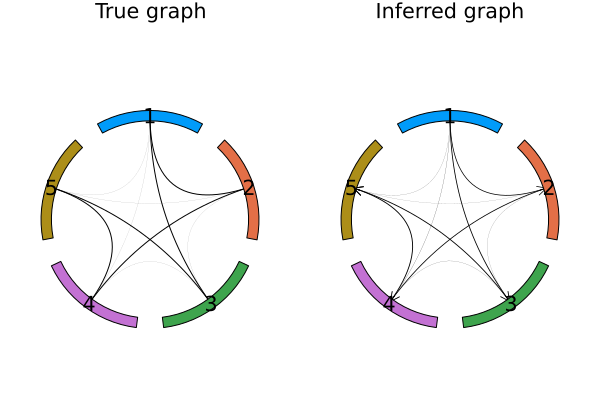

In [29]:
using GraphRecipes
using NetworkLayout
using Plots

p1 = graphplot(f_true, edgewidth = abs.(f_true), names = 1:N, method = :chorddiagram, title = "True graph")
p2 = graphplot(Fij, edgewidth = abs.(Fij), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p2, aspect_ratio = 1)


In [30]:
Z = Any[]
for i in 1:size(Fij,1)
    for j in i+1:size(Fij,2)
        if Fij[i,j]>0.7
            push!(Z, [i,j])
        end
    end
end

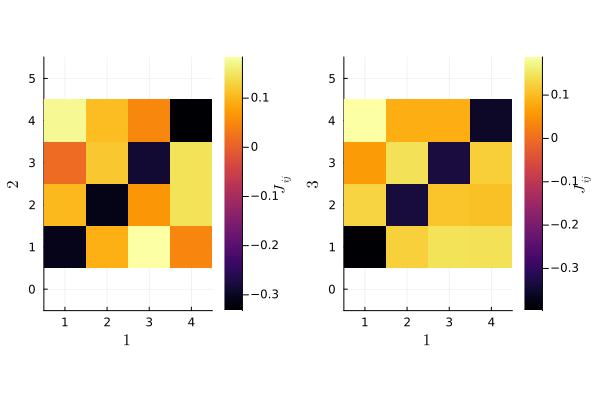

In [31]:
using Plots
using LaTeXStrings
p = Any[]
for i in 1:size(Z,1)
    g = heatmap(J[Z[i][1], Z[i][2]], xlabel = L"%$(Z[i][1])", ylabel = L"%$(Z[i][2])", colorbar_title = L"J_{ij}")
    push!(p,g)
end
plot(p[1], p[2], aspect_ratio = 1)

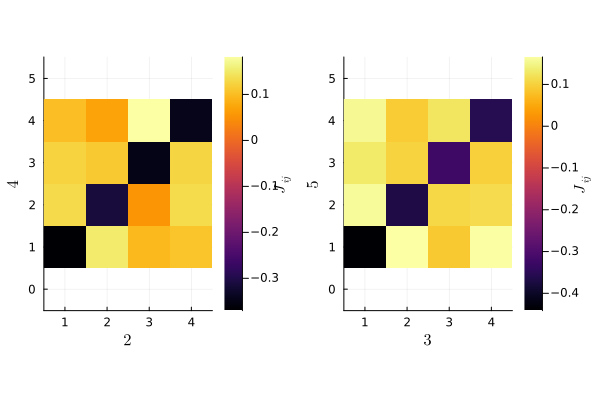

In [32]:
plot(p[3], p[4], aspect_ratio = 1)

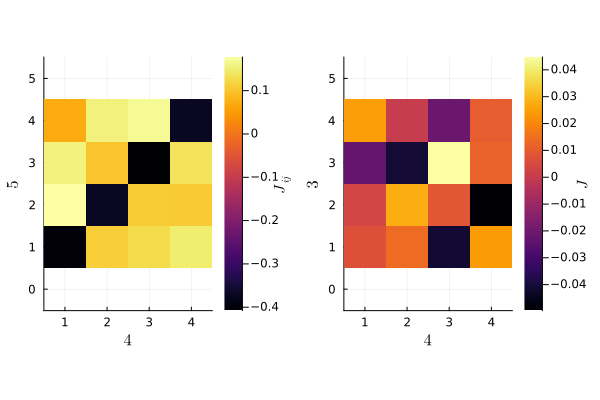

In [33]:
uncorrelated = heatmap(J[5,1], xlabel = L"4", ylabel = L"3", colorbar_title = L"J")
plot(p[5], uncorrelated, aspect_ratio = 1)